## Байтерекова Нурайым, Лабораторная Работа №4

###    Работа с классификацией данных при помощи skikit-learn. Построение модели машинного обучения методом k-средних.

In [1]:
from sklearn.datasets import load_digits, load_wine

digits_dataset = load_digits()
wine_dataset = load_wine()

## Изучение данных DIGITS

In [2]:
print("Ключи load_digits: \n{}".format(digits_dataset.keys()))


Ключи load_digits: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
print(digits_dataset['DESCR'][:1000]+"\n...")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print("Названия ответов:{}".format(digits_dataset['target_names']))

Названия ответов:[0 1 2 3 4 5 6 7 8 9]


In [5]:
print("Названия признаков:{}".format(digits_dataset['feature_names']))

Названия признаков:['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [6]:
print("Тип массива data:{}".format(type(digits_dataset['data'])))

Тип массива data:<class 'numpy.ndarray'>


In [7]:
print("Форма массива data:{}".format(digits_dataset['data'].shape))

Форма массива data:(1797, 64)


In [8]:
print("Первые пять (150) строк массива data:\n{}".format(digits_dataset['data'][:150]))

Первые пять (150) строк массива data:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  0.  3. ... 10.  1.  0.]
 [ 0.  0.  6. ...  9.  1.  0.]]


In [9]:
print("Тип массива target: {}".format(type(digits_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [10]:
print("Форма массива target: {}".format(digits_dataset['target'].shape))

Форма массива target: (1797,)


In [11]:
print("Ответы:\n{}".format(digits_dataset['target']))

Ответы:
[0 1 2 ... 8 9 8]


## Разделение на обучающие и тестовые наборы DIGITS

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'],
                                                    random_state=0)

In [13]:
print("Форма массива Х_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))

Форма массива Х_train: (1347, 64)
Форма массива y_train: (1347,)


In [14]:
print("Форма массива Х_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива Х_test: (450, 64)
Форма массива y_test: (450,)


## Исследование данных DIGITS

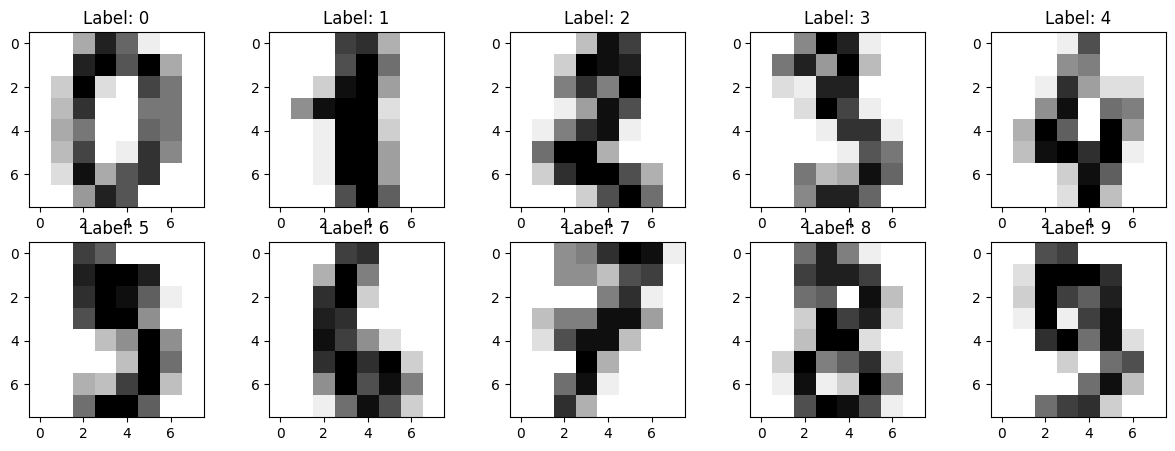

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits_dataset.images[i], cmap=plt.cm.gray_r)
    ax.set_title(f"Label: {digits_dataset.target[i]}")

plt.show()

## 	Построим модель по методу k-ближайших средних и протестируем на произвольном наборе данных

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Прогноз модели DIGITS

In [18]:
y_pred = knn.predict(X_test)
print("Прогноз:{}".format(X_test))
print("Спрогнозируемые метки:{}".format(y_pred))

Прогноз:[[ 0.  0. 11. ... 13. 16.  8.]
 [ 0.  1. 15. ...  1.  0.  0.]
 [ 0.  2. 13. ... 16. 16.  3.]
 ...
 [ 0.  0. 11. ...  7.  0.  0.]
 [ 0.  0.  5. ...  7.  0.  0.]
 [ 0.  2. 14. ...  6.  0.  0.]]
Спрогнозируемые метки:[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 3 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 2 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 7 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 5 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0

## Оценим качество модели DIGITS, а также сделаем вывод по качеству модели

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели с k={3}: {accuracy:.2f}")

Точность модели с k=3: 0.99


In [20]:
confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(confusion)

Матрица ошибок:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  2  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0  0  0 47]]


In [21]:
from sklearn.metrics import classification_report
print("Отчет о классификации:")
classification_rep = classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)])

# Вывод оценок и выводов
print(classification_rep)

Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.98      0.99        43
           2       0.98      1.00      0.99        44
           3       0.96      0.98      0.97        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.98      1.00      0.99        48
           8       1.00      0.96      0.98        48
           9       0.98      1.00      0.99        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    digits_dataset['data'],digits_dataset['target'],random_state=0
)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Правильность на тестовом наборе : {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе : 0.99


## Изучение данных WINE

In [23]:
print("Ключи load_wine: \n{}".format(wine_dataset.keys()))

Ключи load_wine: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [24]:
print(wine_dataset['DESCR'][:1000]+"\n...")

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [25]:
print("Названия ответов:{}".format(wine_dataset['target_names']))

Названия ответов:['class_0' 'class_1' 'class_2']


In [26]:
print("Названия признаков:{}".format(wine_dataset['feature_names']))

Названия признаков:['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [27]:
print("Тип массива data:{}".format(type(wine_dataset['data'])))

Тип массива data:<class 'numpy.ndarray'>


In [28]:
print("Форма массива data:{}".format(wine_dataset['data'].shape))

Форма массива data:(178, 13)


In [29]:
print("Первые пять (150) строк массива data:\n{}".format(wine_dataset['data'][:150]))

Первые пять (150) строк массива data:
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.287e+01 4.610e+00 2.480e+00 ... 5.400e-01 1.860e+00 6.250e+02]
 [1.332e+01 3.240e+00 2.380e+00 ... 5.500e-01 1.620e+00 6.500e+02]
 [1.308e+01 3.900e+00 2.360e+00 ... 5.700e-01 1.330e+00 5.500e+02]]


In [30]:
print("Тип массива target: {}".format(type(wine_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [31]:
print("Форма массива target: {}".format(wine_dataset['target'].shape))

Форма массива target: (178,)


In [32]:
print("Ответы:\n{}".format(wine_dataset['target']))

Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Разделение на обучающие и тестовые наборы WINE

In [33]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(wine_dataset['data'], wine_dataset['target'],
                                                    random_state=0)

In [34]:
print("Форма массива Х_train: {}".format(X_train2.shape))
print("Форма массива y_train: {}".format(y_train2.shape))

Форма массива Х_train: (133, 13)
Форма массива y_train: (133,)


In [35]:
print("Форма массива Х_test: {}".format(X_test2.shape))
print("Форма массива y_test: {}".format(y_test2.shape))

Форма массива Х_test: (45, 13)
Форма массива y_test: (45,)


## Исследование данных WINE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

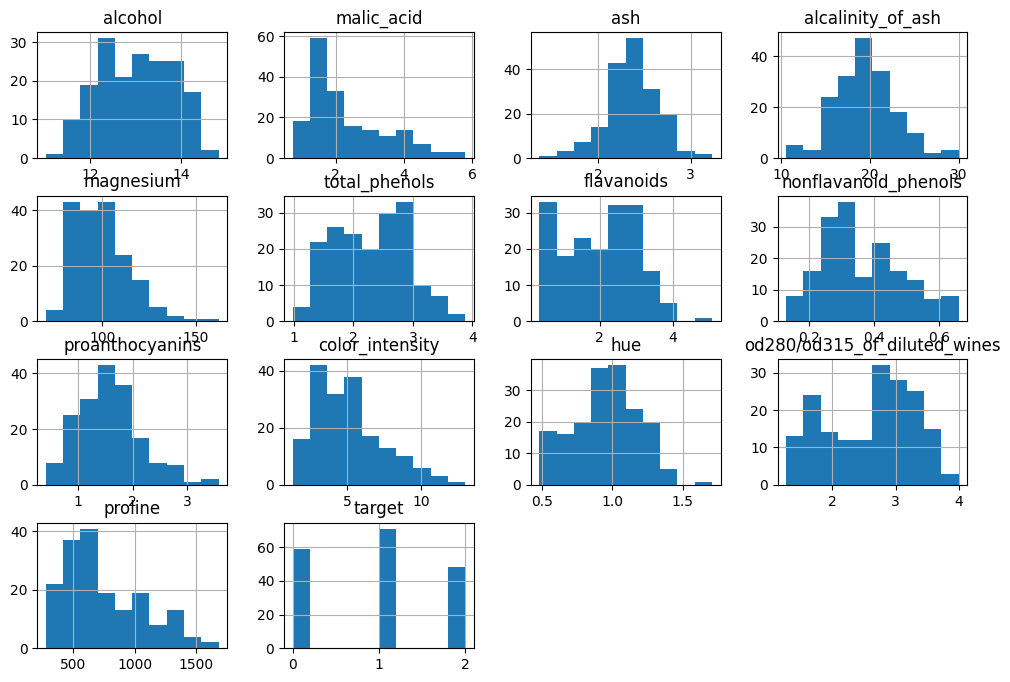

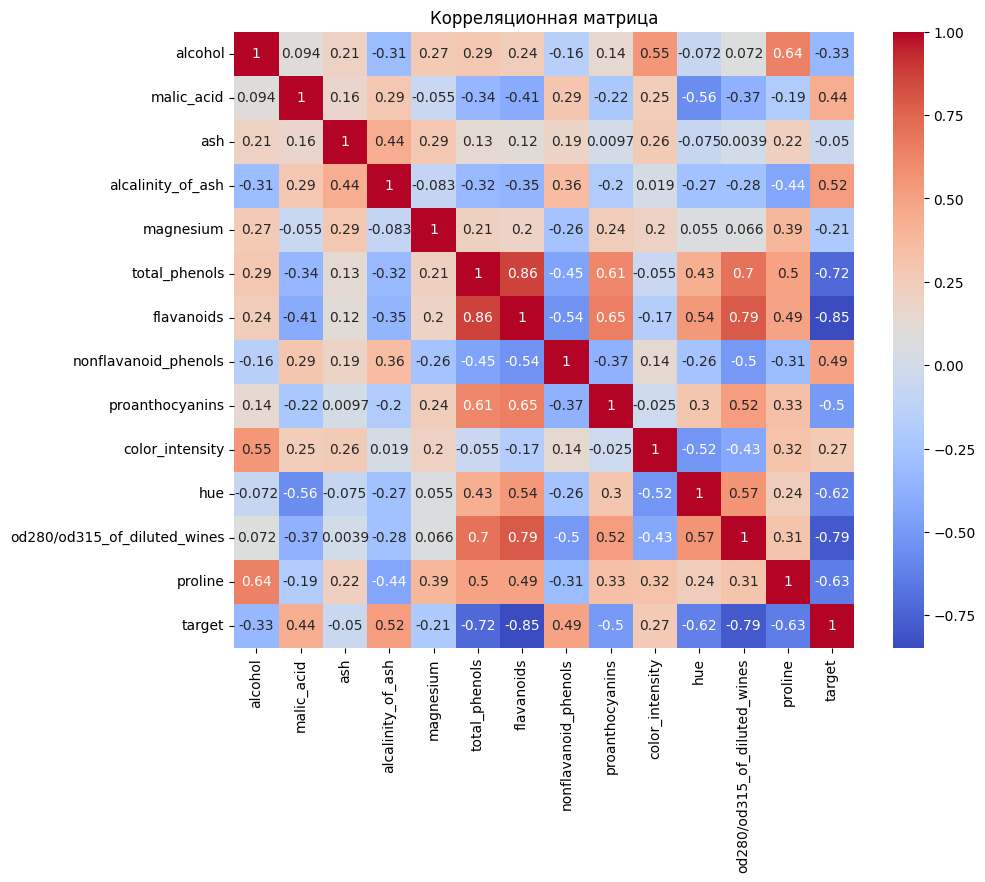

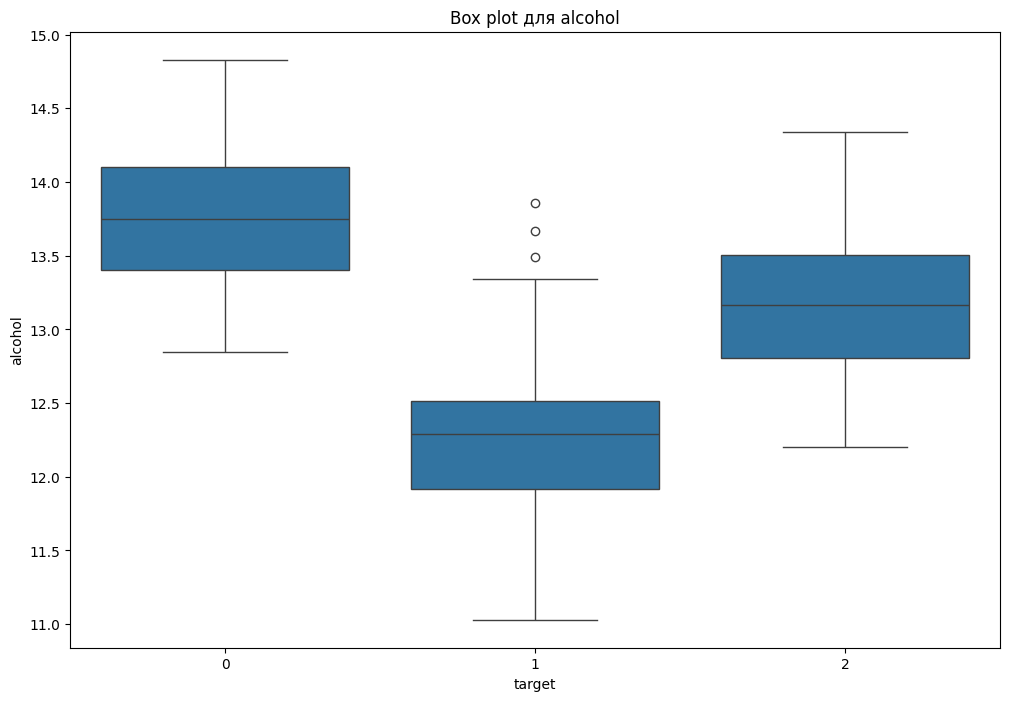

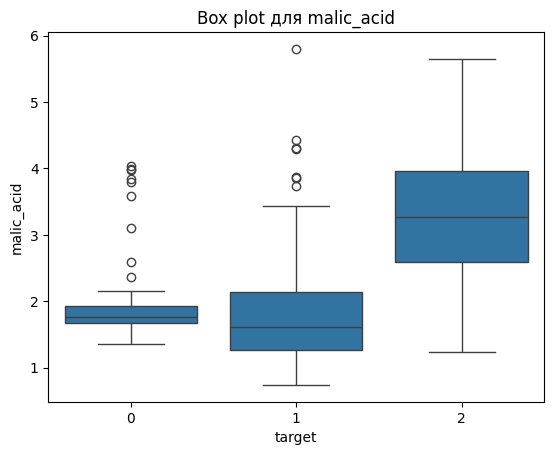

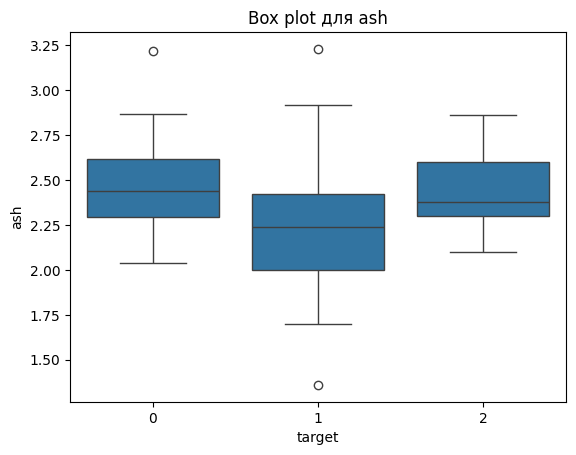

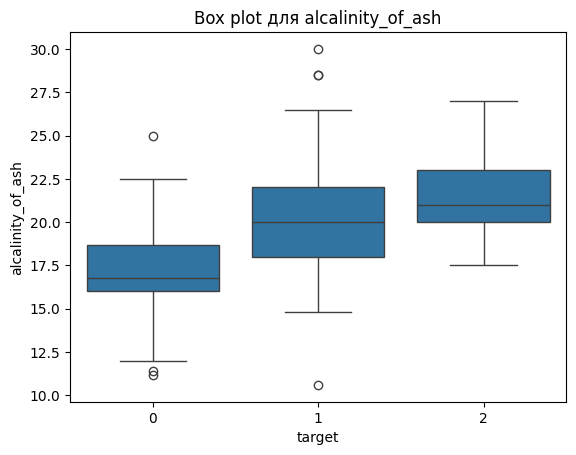

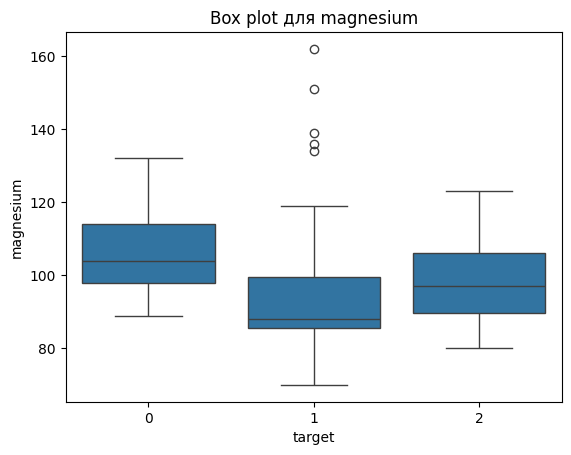

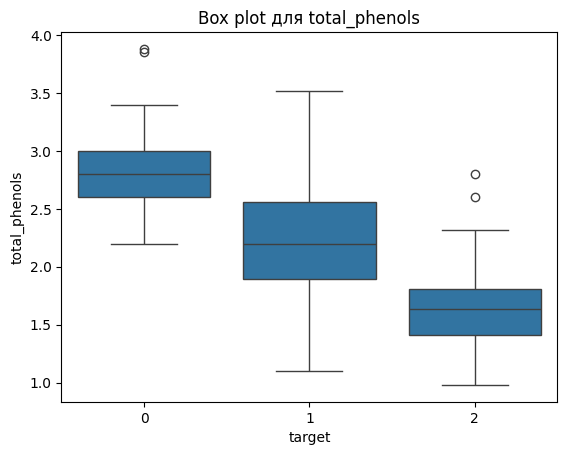

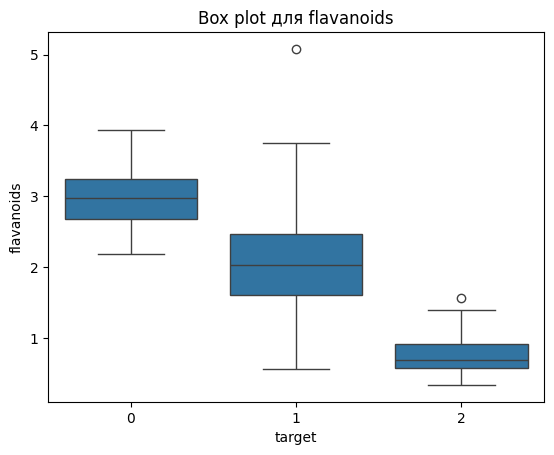

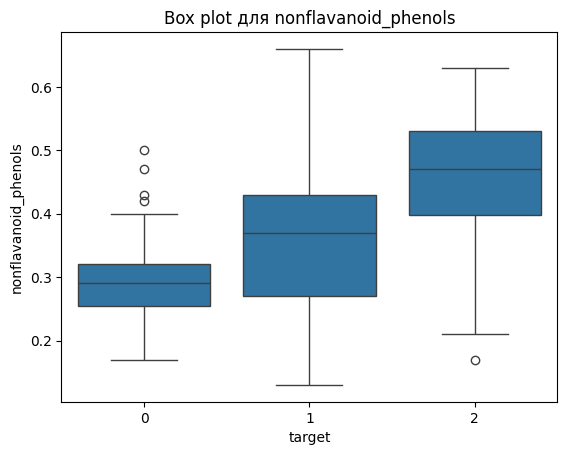

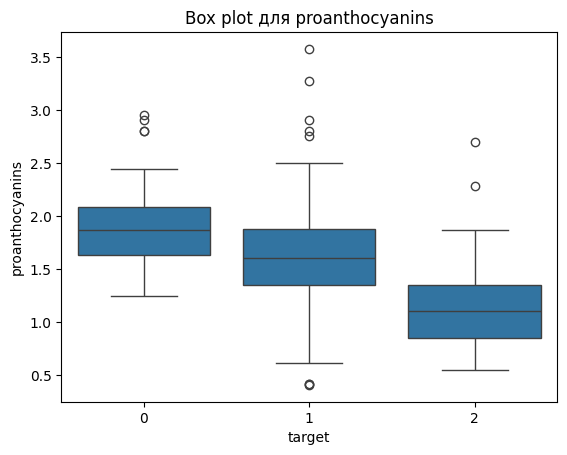

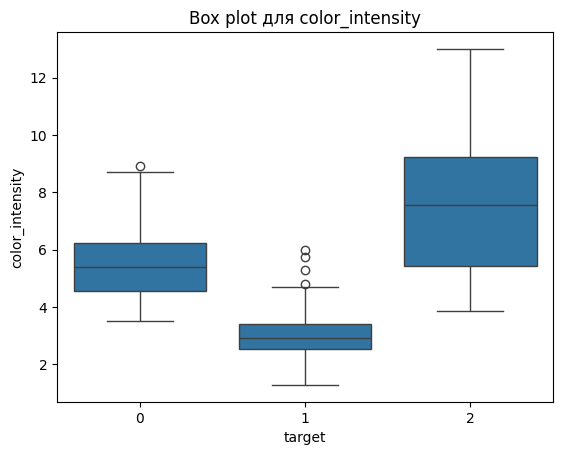

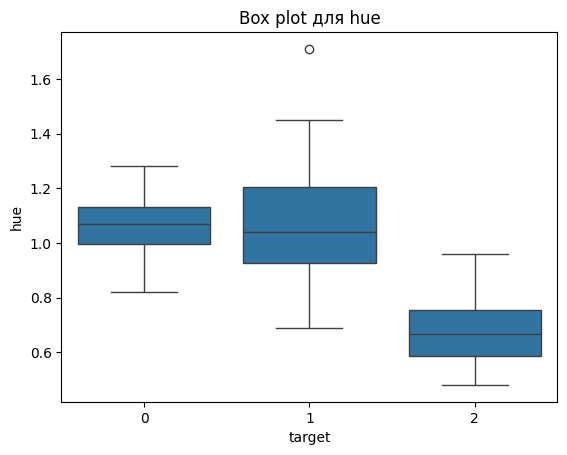

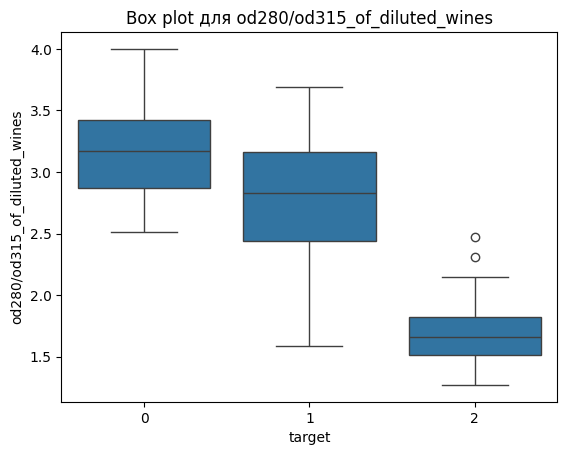

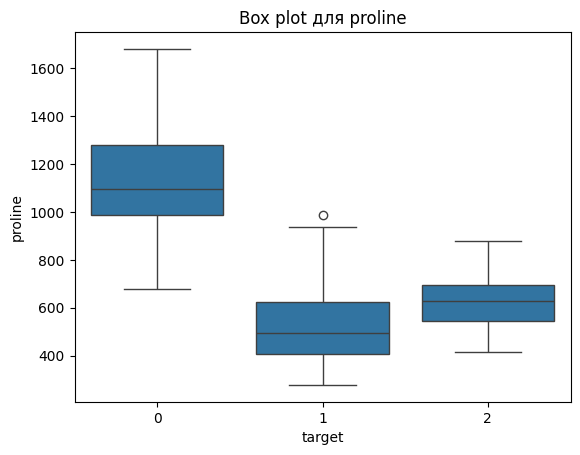

In [36]:
import pandas as pd
import seaborn as sns


# Создание DataFrame из данных
wine_df = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)

# Добавление столбца с метками классов
wine_df['target'] = wine_dataset.target

# Основная информация о данных
print(wine_df.info())

# Основная статистика по числовым признакам
print(wine_df.describe())

# Гистограмма для каждого числового признака
wine_df.hist(bins=10, figsize=(12, 8))
plt.show()

# Корреляционная матрица и тепловая карта
correlation_matrix = wine_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Box plot для каждого числового признака по классам
plt.figure(figsize=(12, 8))
for feature in wine_dataset.feature_names:
    sns.boxplot(x='target', y=feature, data=wine_df)
    plt.title(f'Box plot для {feature}')
    plt.show()


## 	Построим модель по методу k-ближайших средних и протестируем на произвольном наборе данных

In [37]:
knn2 = KNeighborsClassifier(n_neighbors=2)

In [38]:
knn2.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=2)

## Прогноз модели WINE

In [39]:
y_pred2 = knn2.predict(X_test2)
print("Прогноз:{}".format(X_test2))
print("\nСпрогнозируемые метки:{}".format(y_pred2))

Прогноз:[[1.374e+01 1.670e+00 2.250e+00 1.640e+01 1.180e+02 2.600e+00 2.900e+00
  2.100e-01 1.620e+00 5.850e+00 9.200e-01 3.200e+00 1.060e+03]
 [1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.480e+00 1.360e+00
  2.400e-01 1.260e+00 1.080e+01 4.800e-01 1.470e+00 4.800e+02]
 [1.237e+01 1.130e+00 2.160e+00 1.900e+01 8.700e+01 3.500e+00 3.100e+00
  1.900e-01 1.870e+00 4.450e+00 1.220e+00 2.870e+00 4.200e+02]
 [1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
  2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03]
 [1.305e+01 5.800e+00 2.130e+00 2.150e+01 8.600e+01 2.620e+00 2.650e+00
  3.000e-01 2.010e+00 2.600e+00 7.300e-01 3.100e+00 3.800e+02]
 [1.156e+01 2.050e+00 3.230e+00 2.850e+01 1.190e+02 3.180e+00 5.080e+00
  4.700e-01 1.870e+00 6.000e+00 9.300e-01 3.690e+00 4.650e+02]
 [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.600e+00 2.510e+00
  3.100e-01 1.250e+00 5.050e+00 1.060e+00 3.580e+00 1.295e+03]
 [1.236e+01 3.830e+00 2.380e+00 2.100e+01 8.800

In [40]:
y_pred2 = knn2.predict(X_test2)
print("Прогноз:{}".format(X_test2))
print("Спрогнозируемые метки:{}".format(y_pred2))

Прогноз:[[1.374e+01 1.670e+00 2.250e+00 1.640e+01 1.180e+02 2.600e+00 2.900e+00
  2.100e-01 1.620e+00 5.850e+00 9.200e-01 3.200e+00 1.060e+03]
 [1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.480e+00 1.360e+00
  2.400e-01 1.260e+00 1.080e+01 4.800e-01 1.470e+00 4.800e+02]
 [1.237e+01 1.130e+00 2.160e+00 1.900e+01 8.700e+01 3.500e+00 3.100e+00
  1.900e-01 1.870e+00 4.450e+00 1.220e+00 2.870e+00 4.200e+02]
 [1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
  2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03]
 [1.305e+01 5.800e+00 2.130e+00 2.150e+01 8.600e+01 2.620e+00 2.650e+00
  3.000e-01 2.010e+00 2.600e+00 7.300e-01 3.100e+00 3.800e+02]
 [1.156e+01 2.050e+00 3.230e+00 2.850e+01 1.190e+02 3.180e+00 5.080e+00
  4.700e-01 1.870e+00 6.000e+00 9.300e-01 3.690e+00 4.650e+02]
 [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.600e+00 2.510e+00
  3.100e-01 1.250e+00 5.050e+00 1.060e+00 3.580e+00 1.295e+03]
 [1.236e+01 3.830e+00 2.380e+00 2.100e+01 8.800

## Оценка качества модели WINE, а также вывод по качеству

In [41]:
# Оценка точности модели
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Точность модели: {accuracy:.2f}')

# Матрица ошибок
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
print('Матрица ошибок:')
print(conf_matrix2)

# Отчет о классификации
class_report2 = classification_report(y_test2, y_pred2, target_names=wine_dataset.target_names)
print('Отчет о классификации:')
print(class_report2)


Точность модели: 0.99
Матрица ошибок:
[[14  1  1]
 [ 1 18  2]
 [ 2  5  1]]
Отчет о классификации:
              precision    recall  f1-score   support

     class_0       0.82      0.88      0.85        16
     class_1       0.75      0.86      0.80        21
     class_2       0.25      0.12      0.17         8

    accuracy                           0.73        45
   macro avg       0.61      0.62      0.61        45
weighted avg       0.69      0.73      0.70        45

